<a href="https://colab.research.google.com/github/Zayyad005/Zayyad005/blob/main/Investigate_a_Dataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: Investigate a Dataset - [No Show Appointment Dataset]

## Table of Contents
###Introduction
###Data Wrangling
###Exploratory Data Analysis
###Conclusion


# Introduction

### Dataset Description 
 i first installed the panda version 0.25.0,i then import the pamda and matplotlib packages.The datset used for the analysis is the No Show Appointment Dataset,which i got through the link below:https://d17h27t6h515a5.cloudfront.net/topher/2017/october/59dd2ee9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
 The set for the analysis is for the analysisis from a hospital record which shows several variables including whether or not the pateint comes for an appointment.The objective of of the analysis is to how the different variables from the dataset interact and results in the pateint being present or absent.The data set contains 14 columns but four question will be posed and only four columns(age,scholarship,handicap and no_show) will be useful to answer the questioned that i posed for the research, hence the other colums will be dropped.
 The four question that was posed are:
 

## Question(s) for Analysis
###Q1.How does Agegroup Affects Whether the Patients show up for their Appointment or Not(Over 18 and  Under 18)?
###Q2.How has been a handicap Affect the patient showing up for Appointment?
###Q3How does having Health Insurance(Scholarship), and being handicap , affected the patient showing up for their appointment?
###Q4.How has patients with Health Insurance or not showed for their Appointment?

## Data Wrangling

In [ ]:
# Upgrade pandas to use dataframe 
!pip install --upgrade pandas==0.25.0


    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01  7% |██▎                             | 747kB 12.6MB/s eta 0:00:01    13% |████▎                           | 1.4MB 27.2MB/s eta 0:00:01    19% |██████▍                         | 2.1MB 13.4MB/s eta 0:00:01    57% |██████████████████▍             | 6.0MB 12.8MB/s eta 0:00:01    68% |██████████████████████          | 7.2MB 13.0MB/s eta 0:00:01    74% |███████████████████████▊        | 7.8MB 13.9MB/s eta 0:00:01    84% |███████████████████████████     | 8.8MB 12.6MB/s eta 0:00:01    90% |█████████████████████████████   | 9.5MB 12.9MB/s eta 0:00:01    96% |██████████████████████████████▉ | 10.1MB 12.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.1MB/s ta 0:00:011   12% |████▏                           | 1.7MB 9.5MB/s eta 0:00:02    17% |█████▋                          | 2.4MB 16.4MB/s eta 0:00:01    41% |█████████████▎                  | 5.6MB 13.0MB/s eta 0:00:01    44% |██████████████▍           

In [ ]:
#The code above is to import the various packages to the noteb ook for the data analysis process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#The code above is to load the chosen dataframe into the jupyter notebook(csv format)
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#The code above is to get the  data sie in rows and columns
df.shape


(110527, 14)

In [ ]:
#The code above is to get the data types present in the columns
df.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
#The code above is to describe statistics of each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
#The code above is to check for empty values in the dataset
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
#The code above is to check for unique values in the dataset
df.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [ ]:
#The code command above is to check for duplicatede values accross the dataset
df.duplicated


<bound method DataFrame.duplicated of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1      

In [ ]:
#To set both cloumns scheduledday and appointmentday to the correct datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'],utc=True)
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'],utc=True)


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#To change the column name from uppercase to lower case
df.rename(columns=lambda x:x.strip().lower(),inplace=True)


In [ ]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#To get the sum of the missing value
df.isnull().sum().any()

False

In [ ]:
#To check for negative value in the age column
neg = df[df['age'] < 0]
df.drop(neg.index, inplace = True)
neg

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
#To check for the values for the handicap column
hand = df[df['handcap'] > 1]
df.loc[ df['handcap'] > 1, 'handcap'] =1
hand.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,No


In [ ]:
#To drop columns that is not needed for the analysis
df.drop(['patientid','appointmentid','gender','scheduledday','appointmentday','neighbourhood','hipertension','diabetes','alcoholism','sms_received'],axis=1,inplace=True)

In [ ]:
df.head()

,age,scholarship,handcap,no-show
0,62,0,0,No
1,56,0,0,No
2,62,0,0,No
3,8,0,0,No
4,56,0,0,No


In [ ]:
#To change the datatype of the no_show column 
df.loc[ df['no-show']=='Yes','no-show'] =1
df.loc[ df['no-show']=='No','no-show'] =0
df.head()


,age,scholarship,handcap,no-show
0,62,0,0,0
1,56,0,0,0
2,62,0,0,0
3,8,0,0,0
4,56,0,0,0


In [ ]:
#To rename the no-show column
df.rename(columns={'no-show':'no_show'},inplace=True)
df.columns


Index(['age', 'scholarship', 'handcap', 'no_show'], dtype='object')

During the course of wrangling the data set whichi involves to gather,assess, and cleaning:
i first installed the specified and upgrade version for pandas according the specified instructions from udacity,then import the various packages pandas,numpy and matploblib which will be needed for the research analysis for the chosen dataset,i then load the dataset no-show for Appointmemnt into the wokrspace notebook in the csv.format.the assessing process was carried out which includes;checking for the size of the entire dataset to know how many columns and rows is in it,then the datatypes present in the entire set was checked this is to ensure to convert from one type to another to ensure analysing is efficient and converting a particular datatypes from object to integers.the statistics of each column was checked to know in details of each data set. futhermore, empty values was checked to ensure the data set is free from any empty values which may bring about error during analysis process.duplicate values was also checked to accross the dataset to ensure no values was duplicated,duplicate values was dropped.The correct datetime for scheduledday and appointmentday was set to which is a cleaning process.The entire columns name was changed from uppercase to lower case call to funcvtion when writing the codes for the research proess and since its case sensitive.negative value was checked for under age column and dropped and also the handicap column was queried to know if its in 0 and 1 which signifies being handicapped or not and the error gotten was dropped which was 4.Lastly, the columns that was not needed for the research question was dropped and the no_show column ws coverted from object to integers to signify patients that show up or not for their appointments and not yes or no which will be cumbersome to wokr with. The entire process above describes step by step procesws of the data wrangling process which proceeded by the exploratoive data analysis.


## Exploratory Data Analysis


In [ ]:
#EXPLORATORY DATA ANALYSIS

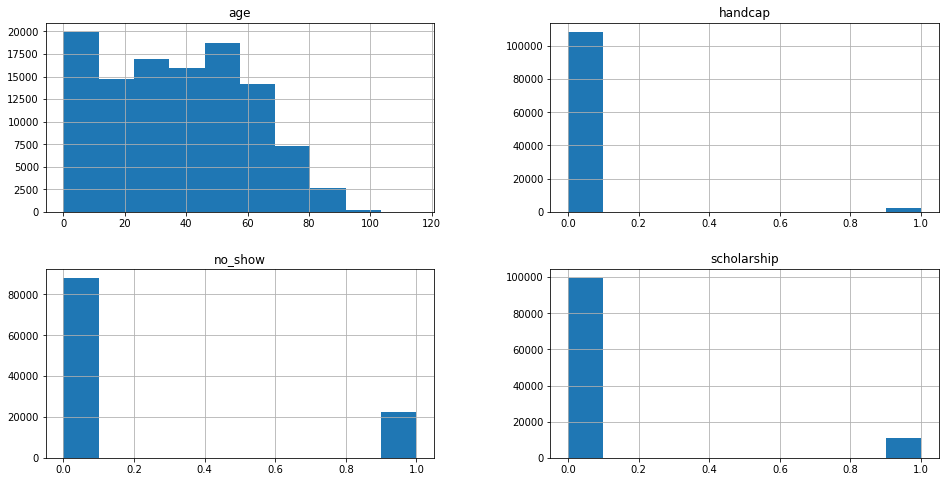

In [ ]:
#to visualise all the chosen data using histogram
df.hist(figsize = (16,8));

The visualisation above shows the distribution of my chosen data for the research in a form of summary, and gives a presentation of how each data set looks like before the research question will be investigated and visualised.

# Question1. How does Agegroup Affects Whether the Patients show up for their Appointment or Not(Over 18 and  Under 18)?

In [ ]:
#To create a new column for the agegroup
bins = [0,18,120]
labels = ['under18','over18']
df['agegroup'] = pd.cut(df['age'], bins, labels = labels, right = False)

In [ ]:
df.head()

,age,scholarship,handcap,no_show,agegroup
0,62,0,0,0,over18
1,56,0,0,0,over18
2,62,0,0,0,over18
3,8,0,0,0,under18
4,56,0,0,0,over18


In [ ]:
#value count for the agegroup
df_agegroup = df.groupby('agegroup')['no_show'].value_counts() 
df_agegroup

agegroup  no_show
under18   0          21382
          1           5997
over18    0          66825
          1          16322
Name: no_show, dtype: int64

In [ ]:
#To count the values for the agegroup based on the index(over 18 and under 18)
df_over18 = df.query('no_show ==1')
df_under18 = df.query('no_show ==0')

In [ ]:
df_agegroup

agegroup  no_show
under18   0          21382
          1           5997
over18    0          66825
          1          16322
Name: no_show, dtype: int64

In [ ]:
#To create a new data frme for over 18 and under 18
df_show = df.query('no_show == 1')

df_noshow = df.query('no_show == 0')

In [ ]:
#To read that dataframe 
df_show

,age,scholarship,handcap,no_show,agegroup
6,23,0,0,1,over18
7,39,0,0,1,over18
11,29,0,0,1,over18
17,40,1,0,1,over18
20,30,0,0,1,over18
21,4,0,0,1,under18
22,13,0,0,1,under18
31,12,1,0,1,under18
44,78,0,0,1,over18
48,58,0,0,1,over18


In [ ]:
df_noshow

,age,scholarship,handcap,no_show,agegroup
0,62,0,0,0,over18
1,56,0,0,0,over18
2,62,0,0,0,over18
3,8,0,0,0,under18
4,56,0,0,0,over18
5,76,0,0,0,over18
8,21,0,0,0,over18
9,19,0,0,0,over18
10,30,0,0,0,over18
12,22,1,0,0,over18


In [ ]:
#To sum the  under 18 agegroup that show up
PR = (df_show.agegroup =='under18').sum()
PR

5997

In [ ]:
#To sum over 18 agegroup that show up
QR =(df_show.agegroup =='over18').sum()
QR

16322

In [ ]:
#To sum the under 18 agegroup that didnt show up
SR =(df_noshow.agegroup =='under18').sum()
SR

21382

In [ ]:
#To sum the over 18 agegroup that didnt show up
RR =(df_noshow.agegroup =='over18').sum()
RR

66825

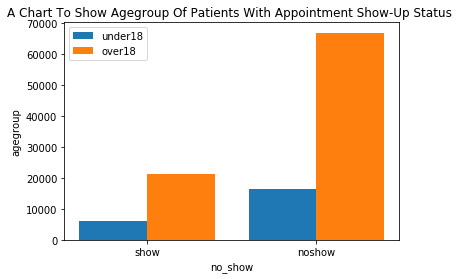

In [ ]:
#To plot a chart to visualise the agegroup of the patient to no_show
X =  ['show','noshow']

show = [PR,QR]
noshow = [SR,RR]

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, show,  width =0.4, label = 'under18')
plt.bar(X_axis + 0.2, noshow, width =0.4, label = 'over18')

plt.xticks(X_axis, X)
plt.xlabel("no_show")
plt.ylabel("agegroup")
plt.title("A Chart To Show Agegroup Of Patients With Appointment Show-Up Status ")
plt.legend();


The chart above shows distribution of patients by agegfroup of over 18 and under 18, who showed up or didnt show up fpr their appointment based on the agegroup.The barchart was used to visualise the distribution, which showed that the agegroup of over18 age group didnt show up for their appointment as compared to the ones tthat showed up and the under 18 agegroup showed up for their appointment more than  the oness that showed up,however first had to create a new column for the agegroup because i will need to use that for the comparism from the first question.

## Question2. How has handicap or Not Affected The patients Showing up for Appointment

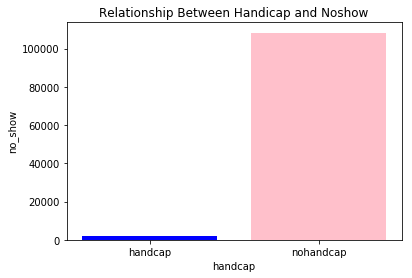

In [ ]:
#creating a function to visualise barchart of the distributioin
color = ['pink','blue']
label = ['nohandcap','handcap']
df_handcap = df['handcap'].value_counts()
def handcap_function(df_handcap):
        plt.bar(label,df_handcap,color = color)
        plt.title('Relationship Between Handicap and Noshow')
        plt.xlabel('handcap')
        plt.ylabel('no_show')
        plt.show()
                        
handcap_function(df_handcap)


Distribution of patient who showed up for their appointment based on if they are handicapped or not was used to visualise the distribution.It shows that patients with no handicap show up for their appointment when compared to patients that are handicapped.

## Question 3. How has patients with Health Insurance or Not and Handicap Showed Up For  Appointment

Text(0.5,0,'no_show')

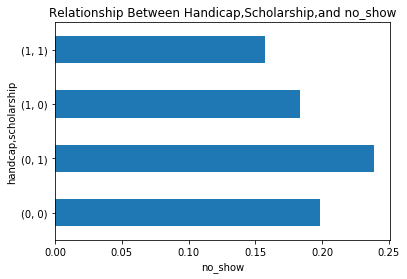

In [ ]:
#To visualise the relationship between handcap and scholarship with no_show using a barchart
df.groupby(['handcap','scholarship']).no_show.mean().plot(kind='barh');
plt.title('Relationship Between Handicap,Scholarship,and no_show')
plt.ylabel('handcap,scholarship')
plt.xlabel('no_show')


The distribution of patients who showed up for their appointment or  not  based to handicapped or not, and whether they have insurance or not which is a bivairate comparism visulised using a barchart signifies thatpatents with no handficap and has health insurance showed up for their appointment the most, then the patients that are not handicap and no health insurance showed up in second order.while the patients with handicap and no  health isurance showed in the third order.lastly patients with handicap and has health insurance showed up the least for theior appointment from the visualisation done.

# # Question 4. How has patients with Health Insurance or Not Showed Up For  Appointment?

In [ ]:
#mask for scholar and no scholar
scholar=df.scholarship == True
noscholar=df.scholarship == False

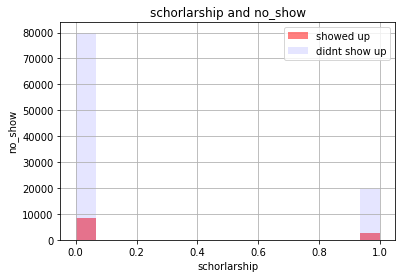

In [ ]:
#visualisation of a plot of histogram
df.no_show[scholar].hist(alpha=0.5, bins=15, color='red',label='showed up')
df.no_show[noscholar].hist(alpha=0.1, bins=15, color='blue',label='didnt show up')
plt.legend();
plt.title('schorlarship and no_show')
plt.xlabel('schorlarship')
plt.ylabel('no_show');

The distribution of patient who showed up as compared to those that didnt show up based on the health insurance did signify that more patient without health showed up for their appointmnet to those that have scholarship.The histogram was used to visualize the distribution.

# #Conclusion


Results:The observation from the dataset at the end of research arec as follows
1. It showed that patients that are over 18 age group generally showed up for their appointment and also the under the age of under 18 didnt showedup as compared to over 18 age  group, which sums up that adults which a clearcut distinct of age above 18 since the index used is over 18 showed up compared to the children which is under 18 age group and alos the population is generally over 18 age group which is another firm reason  to why they show up for their appointment.

2.Health insurance has has little effect as to why the patient show up for their appointment, this  is as a result that there wasnt a considerable difference in number from the question 4 posed.

3.patients who are not handicap showedup more for their appointment compared to the ones that are handicap.

4.Finally,At the end of the research,the four question that was posed at the beginning was visualised and the some relatioship was establishd between the variables

## Limitations


1.The  limitation was that the patient noshowcolumn which had to be coverted from object to integers.


# Reference

[1]:https://d17h27t6h515a5.cloudfront.net/topher/2017/october/59dd2ee9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv 
[2] W. McKinney, Python for data analysis: data wrangling with pandas, NumPy, and IPython, Second edition. Sebastopol, California: O’Reilly Media, Inc, 2018.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0